In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# resize all the image to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [7]:
# Import the resnet 50 library as shown below and add preprocesssing layer to the front of the resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# + [3] in the above line is the RGB Channel

94773248/94765736 [==============================] - 17s 0us/step


In [8]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
# Useful for getting number of output classes
folders = glob('Datasets/train/*')

In [11]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [12]:
len(folders)

3

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataseets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [20]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 58 images belonging to 3 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\Aman kumar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 11s 6s/step - loss: 3.6712 - accuracy: 0.4219 - val_loss: 12.8113 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 13.9973 - accuracy: 0.2969 - val_loss: 6.1503 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 4.4067 - accuracy: 0.3438 - val_loss: 6.9804 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 6.8105 - accuracy: 0.3906 - val_loss: 7.9354 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 5.4699 - accuracy: 0.3906 - val_loss: 1.4370 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 1.7806 - accuracy: 0.4844 - val_loss: 4.1179 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 3.9560 - accuracy: 0.3594 - val_loss: 3.6483 - val_accuracy: 0.5172
Epoch 8/50
2/2 [======================

In [23]:
r.history

{'loss': [3.6711771488189697,
  13.997333526611328,
  4.406736373901367,
  6.810503005981445,
  5.469851493835449,
  1.780572772026062,
  3.955968141555786,
  3.13778018951416,
  0.916278064250946,
  2.2496590614318848,
  1.3644614219665527,
  1.5562896728515625,
  1.4352877140045166,
  0.7032670378684998,
  1.3810818195343018,
  0.7896760106086731,
  1.0212862491607666,
  0.6592938303947449,
  0.6206964254379272,
  0.49494022130966187,
  0.5128258466720581,
  0.39201050996780396,
  0.466593474149704,
  0.40534621477127075,
  0.41484618186950684,
  0.3490148186683655,
  0.3950842022895813,
  0.38633638620376587,
  0.3512497544288635,
  0.33327895402908325,
  0.3521534204483032,
  0.3030804395675659,
  0.2773224711418152,
  0.32225775718688965,
  0.3038143515586853,
  0.28172963857650757,
  0.2573491334915161,
  0.24662700295448303,
  0.2827931046485901,
  0.25485605001449585,
  0.2835260331630707,
  0.20921194553375244,
  0.24340097606182098,
  0.27358055114746094,
  0.2381615638732910

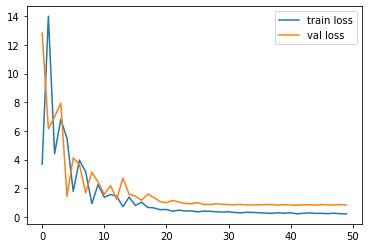

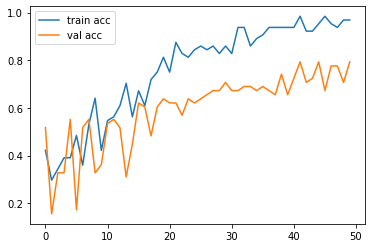

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\Aman kumar\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[1.4485460e-03, 8.9528757e-01, 1.0326394e-01],
       [3.1276468e-02, 6.1419445e-01, 3.5452899e-01],
       [2.2741588e-02, 8.7451041e-01, 1.0274807e-01],
       [1.2843777e-02, 9.6632063e-01, 2.0835612e-02],
       [5.8233934e-03, 6.5259075e-01, 3.4158581e-01],
       [6.4661390e-01, 3.4721503e-01, 6.1711268e-03],
       [4.5228065e-03, 9.7655368e-01, 1.8923460e-02],
       [1.0928107e-01, 8.0095208e-04, 8.8991797e-01],
       [5.5022873e-02, 6.8466002e-01, 2.6031709e-01],
       [7.2901823e-02, 7.4094469e-03, 9.1968876e-01],
       [3.2541826e-02, 2.1889927e-02, 9.4556826e-01],
       [3.8834664e-01, 1.0987226e-01, 5.0178111e-01],
       [3.7122440e-02, 7.0744157e-01, 2.5543594e-01],
       [5.8225143e-01, 3.5320756e-01, 6.4541034e-02],
       [1.8749154e-01, 3.8157010e-01, 4.3093845e-01],
       [5.7036410e-05, 6.5298460e-04, 9.9928999e-01],
       [5.6092020e-02, 4.2059872e-01, 5.2330929e-01],
       [7.7538863e-03, 5.5102187e-01, 4.4122422e-01],
       [1.8560950e-02, 9.318

In [28]:
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1], dtype=int64)

In [30]:
model  = load_model('model_resnet50.h5')

In [43]:
img = image.load_img('Datasets/Test/mercedes/40.jpg', target_size=(224, 224))

In [44]:
x = image.img_to_array(img)
x

array([[[ 71., 131., 193.],
        [ 71., 131., 193.],
        [ 70., 130., 192.],
        ...,
        [  3.,  81., 145.],
        [  3.,  81., 145.],
        [  3.,  81., 145.]],

       [[ 71., 131., 193.],
        [ 71., 131., 193.],
        [ 71., 131., 193.],
        ...,
        [  2.,  82., 145.],
        [  2.,  82., 145.],
        [  2.,  82., 145.]],

       [[ 72., 132., 194.],
        [ 72., 132., 194.],
        [ 71., 131., 193.],
        ...,
        [  2.,  82., 145.],
        [  2.,  82., 145.],
        [  2.,  82., 145.]],

       ...,

       [[ 75.,  64.,  60.],
        [ 75.,  64.,  60.],
        [ 76.,  65.,  61.],
        ...,
        [245., 237., 234.],
        [246., 238., 235.],
        [247., 239., 236.]],

       [[ 74.,  63.,  59.],
        [ 82.,  71.,  67.],
        [ 77.,  66.,  62.],
        ...,
        [237., 232., 229.],
        [237., 232., 229.],
        [237., 232., 229.]],

       [[ 74.,  63.,  59.],
        [ 82.,  71.,  67.],
        [ 77.,  

In [45]:
x.shape

(224, 224, 3)

In [46]:
x = x / 255

In [47]:
x

array([[[0.2784314 , 0.5137255 , 0.75686276],
        [0.2784314 , 0.5137255 , 0.75686276],
        [0.27450982, 0.50980395, 0.7529412 ],
        ...,
        [0.01176471, 0.31764707, 0.5686275 ],
        [0.01176471, 0.31764707, 0.5686275 ],
        [0.01176471, 0.31764707, 0.5686275 ]],

       [[0.2784314 , 0.5137255 , 0.75686276],
        [0.2784314 , 0.5137255 , 0.75686276],
        [0.2784314 , 0.5137255 , 0.75686276],
        ...,
        [0.00784314, 0.32156864, 0.5686275 ],
        [0.00784314, 0.32156864, 0.5686275 ],
        [0.00784314, 0.32156864, 0.5686275 ]],

       [[0.28235295, 0.5176471 , 0.7607843 ],
        [0.28235295, 0.5176471 , 0.7607843 ],
        [0.2784314 , 0.5137255 , 0.75686276],
        ...,
        [0.00784314, 0.32156864, 0.5686275 ],
        [0.00784314, 0.32156864, 0.5686275 ],
        [0.00784314, 0.32156864, 0.5686275 ]],

       ...,

       [[0.29411766, 0.2509804 , 0.23529412],
        [0.29411766, 0.2509804 , 0.23529412],
        [0.29803923, 0

In [48]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[6.0058833e-04, 2.3117885e-03, 9.9708766e-01]], dtype=float32)

In [50]:
a = np.argmax(model.predict(img_data), axis=1)

In [51]:
a

array([2], dtype=int64)

In [52]:
a==2

array([ True])

In [53]:
a==1

array([False])